# Logistic Regression

We consider a random variable $y \in \{0, 1\}$, with:

$$ prob(y=1)=p, \hspace{0.5cm} prob(y=0)=1-p$$

where $p \in [0,1]$, and  is assumed to depend on a vector of explanatory variables $u \in R^n$. 

For example, $y = 1$ might mean that an individual in a population acquires a certain disease. The probability of acquiring the disease is p, which is modeled as a function of some explanatory variables u, which might represent weight, age, height, blood pressure, and other medically relevant variables.

The logistic model has the form:

$$p = \frac{exp(a^Tu+b)}{1+exp(a^Tu+b)}$$

Where $a \in R^n$ and $b \in R$ are the model parameters that determine how the probability p varies as a function of the explanatory variable u.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Figures 7.1, page 355.
# Logistic regression.

import pickle
from cvxopt import solvers, matrix, spdiag, log, exp, div

solvers.options['show_progress'] = False

def F(x=None, z=None):
   if x is None: return 0, matrix(0.0, (2,1))
   w = exp(A*x)
   f = c.T*x + sum(log(1+w))
   grad = c + A.T * div(w, 1+w)
   if z is None: return f, grad.T
   H = A.T * spdiag(div(w,(1+w)**2)) * A
   return f, grad.T, z[0]*H


data = pickle.load(open("/content/drive/MyDrive/Optimizacion_Convexa/03_Applications_to_modelling/Logistic_Regression/logreg.bin",'rb'))
u, y = data['u'], data['y']

# minimize   sum_{y_k = 1} (a*uk + b) + sum log (1 + exp(a*u + b))
# two variables a, b.
m = u.size[0]
A = matrix(1.0, (m,2))
A[:,0] = u
c = -matrix([sum( uk for uk, yk in zip(u,y) if yk ), sum(y) ])

# minimize  c'*x + sum log (1 + exp(A*x))
# variable x (2).
sol = solvers.cp(F)
a, b = sol['x'][0], sol['x'][1]

Now suppose we are given some data consisting of a set of values of the explanatory variables $u_1, ..., u_m \in R^n$ along with the corresponding outcomes $y1, ... , y_m \in \{0, 1\}$.  Our job is to find a maximum likelihood estimate of the model parameters $a \in R^n$ and $b \in R$. Finding an ML estimate of a and b is sometimes called <i>logistic regression</i>.

We can re-order the data so for $u_1, ..., u_q$, the outcome is $y=1$ and for $u_{q+1}, ..., u_m $ the outcome is $y=0$. The likelihood function then has the form:

$$\prod_{i=1}^{q}p_i \prod_{i=q+1}^{m} (1 - p_i)$$

Where $p_i$ is given by the logistic model with explanatory variable $u_i$. The loglikelihood function has the form:

$$l(a, b) = \sum_{i=1}^{q}log p_i + \sum_{i=q+1}^{m}log(1-p_i)$$

$$=\sum_{i=1}^{q} log \frac{exp(a^T u_i + b)}{1+exp(a^Tu_i + b)} + \sum_{i=q+1}^{m}log \frac{1}{1+exp(a^Tu_i + b)}$$

$$=\sum_{i=1}^{q}(a^Tu_i + b) - \sum_{i=1}^{m}log(1+exp(a^Tu_i+b))$$
 
<img src="https://drive.google.com/uc?export=view&id=1co65oNXXup3DILJtBJM0BJBEIuuaCRrv" width="600" align="center"/>

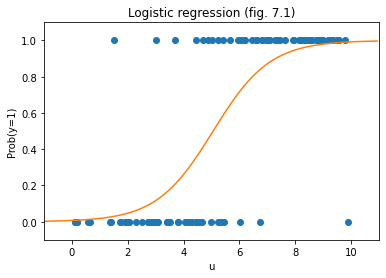

In [ ]:
try: import pylab
except ImportError: pass
else:
    pylab.figure(facecolor='w')
    nopts = 200
    pts = -1.0 + 12.0/nopts * matrix(list(range(nopts)))
    w = exp(a*pts + b)
    pylab.plot(u, y, 'o', pts, div(w, 1+w), '-')
    pylab.title('Logistic regression (fig. 7.1)')
    pylab.axis([-1, 11, -0.1, 1.1])
    pylab.xlabel('u')
    pylab.ylabel('Prob(y=1)')
    pylab.show()